# Знакомство с word2vec


## Загрузка модели
Скачаем модель <code>google-news-vectors</code>. Откроем ее с помощью библиотеки <code>gensim</code>.

In [1]:
!pip install -q -U gensim
!pip install -q opendatasets
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300")

# Для быстрой загрузки данных следует ввест логин и токен с Kaggle
# либо убрать последнюю строку загружать файл локально в колаб (долго)

Skipping, found downloaded files in "./googlenewsvectorsnegative300" (use force=True to force download)


In [2]:
import warnings
warnings.filterwarnings('ignore')

import gensim
from gensim.models import KeyedVectors

w = KeyedVectors.load_word2vec_format("/content/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin",
                                      binary=True)

Структура называется <code>KeyedVectors</code> и по сути представляет собой отображение между ключами и векторами. Каждый вектор идентифицируется своим ключом поиска, чаще всего коротким строковым токеном, поэтому обычно это соответствие между

<center><code>{str => 1D numpy array}</code></center><br/>



Например, выведем первые 10 координат вектора, соответствующего слову <code>sunrise</code>

In [3]:
print("Размерность вектора: ", w["sunrise"].shape)
print("Первые 10 координат вектора: \n", w["sunrise"][:10])

Размерность вектора:  (300,)
Первые 10 координат вектора: 
 [-0.22558594 -0.03540039 -0.21679688  0.03613281 -0.2265625  -0.09814453
  0.109375   -0.34570312  0.18652344  0.01806641]


## Задание 1. Сходство.

Извлеките векторы слов <code>London</code>, <code>England</code>, <code>Moscow</code>. Посчитайте косинусное расстояние между словами <code>London</code> и <code>England</code> и между словами <code>Moscow</code> и <code>England</code>. Какая пара слов ближе? Подсказка: для вычисления косинусного расстояния использвется метод <code>distance()</code>. Правильный ответ представлен в блоке вывода.

In [4]:
# Извлечение векторов слов
london = w["London"]
england = w["England"]
moscow = w["Moscow"]

# Вычисление косинусного расстояния
dist_london_england = w.distance("London", "England")
dist_moscow_england = w.distance("Moscow", "England")

print(f"Косинусное расстояние между London и England: {dist_london_england}")
print(f"Косинусное расстояние между Moscow и England: {dist_moscow_england}")

Косинусное расстояние между London и England: 0.5600714385509491
Косинусное расстояние между Moscow и England: 0.8476868271827698


In [5]:
if dist_london_england < dist_moscow_england:
    print("Пара слов London и England ближе друг к другу.")
else:
    print("Пара слов Moscow и England ближе друг к другу.")

Пара слов London и England ближе друг к другу.


## Задание 2. Аналогии.
С помощью метода most_similar решите аналогию
```London : England = Moscow : X```

Правильный ответ представлен в блоке вывода.

(Подсказка: нужно использовать аргументы positive и negative)

In [6]:
result = w.most_similar(positive=["Moscow", "England"], negative=["London"])
print(f"X = {result[0][0]}")

X = Russia


## Задание 3. Сходство: найти лишнее.
С помощью метода <code>doesnt_match</code> найдите лишнее слово в ряду <code>breakfast cereal dinner lunch</code>.

Правильный ответ представлен в блоке вывода.

In [7]:
words = ["breakfast", "cereal", "dinner", "lunch"]

outlier = w.doesnt_match(words)
print(f"Лишнее слово: {outlier}")

Лишнее слово: cereal


## Задание 4. Представление предложений в виде векторов


Дано предложение: <code>the quick brown fox jumps over the lazy dog</code>. Вам нужно представить это предложение в виде вектора. Для этого найдите вектор каждого слова в модели, а затем усредните векторы покомпонентно.


In [8]:
import numpy as np

In [9]:
sentence = "the quick brown fox jumps over the lazy dog"

words = sentence.split()

vector = np.mean([w[word] for word in words if word in w.key_to_index], axis=0)

print(f"Вектор предложения (первые 5 координат вектора-предложения): {vector[:5]}")

Вектор предложения (первые 5 координат вектора-предложения): [ 0.09055582  0.05434163 -0.06713867  0.10968696 -0.01060655]


# Сравнение двух моделей

## Загрузка ещё одной модели


Откроем модель google-news-vectors и модель, обученную на британском национальном корпусе http://vectors.nlpl.eu/repository/20/0.zip, с помощью gensim.


In [10]:
! wget -c http://vectors.nlpl.eu/repository/20/0.zip
! unzip 0.zip
! head -3 model.txt

--2024-05-05 15:15:12--  http://vectors.nlpl.eu/repository/20/0.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Archive:  0.zip
replace meta.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace model.bin? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace model.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace README? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
163473 300
say_VERB -0.008861 0.097097 0.100236 0.070044 -0.079279 0.000923 -0.012829 0.064301 -0.029405 -0.009858 -0.017753 0.063115 0.033623 0.019805 0.052704 -0.100458 0.089387 -0.040792 -0.088936 0.110212 -0.044749 0.077675 -0.017062 -0.063745 -0.009502 -0.079371 0.066952 -0.070209 0.063761 -0.038194 -0.046252 0.049983 -0.094985 -0.086341 0.024665 -0.112857 -0.038358 -0.007008 -0.010063 -0.000183 

Загрузим модель, обученную на британском национальном корпусе

In [11]:
w_british = KeyedVectors.load_word2vec_format("model.bin", binary=True)

Заметим, что размерность векторов в этом случае также равна 300. При этом через нижнее подчеркивание нужно указывать часть речи используемого слова. Слова следует приводить к нижнему регистру.

In [12]:
try:
    print(w_british["London_NOUN"].shape)
    print('upper is ok')
except:
    print(w_british["london_NOUN"].shape)
    print('lower is ok')

(300,)
lower is ok


## Набор данных для оценки качества
Скачаем датасет wordsim353.



In [13]:
!wget -c http://alfonseca.org/pubs/ws353simrel.tar.gz
!tar -xvf ws353simrel.tar.gz
!head -5 wordsim353_sim_rel/wordsim_similarity_goldstandard.txt

--2024-05-05 15:15:55--  http://alfonseca.org/pubs/ws353simrel.tar.gz
Resolving alfonseca.org (alfonseca.org)... 162.215.249.67
Connecting to alfonseca.org (alfonseca.org)|162.215.249.67|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

wordsim353_sim_rel/wordsim353_agreed.txt
wordsim353_sim_rel/wordsim353_annotator1.txt
wordsim353_sim_rel/wordsim353_annotator2.txt
wordsim353_sim_rel/wordsim_relatedness_goldstandard.txt
wordsim353_sim_rel/wordsim_similarity_goldstandard.txt
tiger	cat	7.35
tiger	tiger	10.00
plane	car	5.77
train	car	6.31
television	radio	6.77


## Подготовка эталонной выборки


Из файла `wordsim_similarity_goldstandard.txt` извлечем пары слов и посчитаем косинусное сходство их векторов в обеих моделях. Посчитаем корреляцию оценок сходства в модели google-news-vectors с оценками аннотаторов в датасете, а затем - корреляцию сходства в модели на основе британского национального корпуса с оценками аннотаторов в датасете. Какая модель ближе к суждениям экспертов-разметчиков?

(используем только те слова из wordsim, для которых находятся векторы на британском корпусе, помеченные как существительные!)

In [14]:
import pandas as pd

df = pd.read_csv("wordsim353_sim_rel/wordsim_similarity_goldstandard.txt",
                 sep="\t", header=None)
df.columns = ["first", "second", "score"]
df.head(3)

,first,second,score
0,tiger,cat,7.35
1,tiger,tiger,10.00
2,plane,car,5.77


## Вычисление оценок similarity моделей
Используем только те слова из wordsim, для которых находятся векторы на британском корпусе, помеченные как существительные, сформируйте 3 массива с оценкам схожести:

1. Оценки (косинус между векторами), полученные в результате модели google-news-vectors

2. Оценки (косинус между векторами) полученные в результате модели на основе британского национального корпуса

3. Эталонные оценки из word_sim, для слов из которых находятся векторы на британском корпусе

Пропущенные слова из word_sim представлены в блоке вывода.

In [15]:
gn_dist, br_dist, scores = [], [], []

for row in df.iterrows():
    w1, w2, s = row[1]["first"], row[1]["second"], row[1]["score"]

    try:
        # Вычислим косинусногое сходство для каждой модели
        gn_sim = w.similarity(w1, w2)
        br_sim = w_british.similarity(w1.lower() + "_NOUN", w2.lower() + "_NOUN")

        # И запишем результы в соответствующие списки
        gn_dist.append(gn_sim)
        br_dist.append(br_sim)
        scores.append(s)

    except KeyError as e:
        print(e, "Skipping this word.")

"Key 'stupid_NOUN' not present" Skipping this word.
"Key 'arafat_NOUN' not present" Skipping this word.
"Key 'harvard_NOUN' not present" Skipping this word.
"Key 'mexico_NOUN' not present" Skipping this word.
"Key 'live_NOUN' not present" Skipping this word.
"Key 'seven_NOUN' not present" Skipping this word.
"Key 'five_NOUN' not present" Skipping this word.
"Key 'mars_NOUN' not present" Skipping this word.


## Выбор модели: корреляция с экспертами

Вычислите корреляцию Спирмена для каждой модели по сравнению с эталонными оценками из word_sim.

Результаты представлены в блоке вывода.

In [16]:
from scipy.stats import spearmanr

In [17]:
corr_gn, _ = spearmanr(gn_dist, scores)
corr_br, _ = spearmanr(br_dist, scores)

print(f"Корреляция Спирмена для модели google-news-vectors: {corr_gn}")
print(f"Корреляция Спирмена для модели на основе британского национального корпуса: {corr_br}")

Корреляция Спирмена для модели google-news-vectors: 0.7817164245392594
Корреляция Спирмена для модели на основе британского национального корпуса: 0.762755193448961


Можно заметить, что модель google-news-vectors несколько выигрывает в данном случае.

# Индивидуальное задание

Переходить к выполнению индивидуального задания следует только после того, как получен корректно работающий блокнот для работы с моделями. Для краткости будем именовать модель google-news-vectors -- GN, а модель на основе британского национального корпуса -- BR.  
</br>  

1. Определите косинусное расстояние между векторами слов: `student` и `smart`:  
    _Введите результат модели GN.
    Десятичный разделитель точка. Ответ округлите до тысячных:_
    ```
    0.934
    ```  

    _Введите результат модели BR.
    Десятичный разделитель точка. Ответ округлите до тысячных:_
    ```
    0.720
    ```
2. Дан набор слов: `student smart wood money`, определите лишнее слово.
    
    _Введите результат модели GN.
    Введите лишнее слово. Все символы должны быть строчными:_
    ```
    wood
    ```
    _Введите результат модели BR. Введите лишнее слово (без _NOUN). Все символы должны быть строчными:_
    ```
    student
    ```
3. Определите косинусное расстояние между векторами предложений:

    _Дисклеймер: из оригинальных пословиц удлаены слова, отсутствующие в модели GN._

    `journey thousand miles begins with single step` и `leopard can not change its spots`.

    Для нахождения вектора предложения требуется найти вектор каждого слова в предложении, а затем усреднить эти векторы покомпонентно (рекомендуем использовать `numpy.mean()` с правильным параметром `axis`).
    </br>  
    _Введите результат модели GN.Десятичный разделитель точка. Ответ округлите до тысячных:_
    ```
    0.672
    ```
4. Из набора данных [word_sim](https://courses.openedu.ru/assets/courseware/v1/e5d93a68121655b8f04aea15b89c130a/asset-v1:ITMOUniversity+AUTXTIMGPROC+spring_2024_ITMO_mag+type@asset+block/wordsim_similarity_goldstandard.txt) извлеките подвыборку пар слов с индексами `19:119` (нумерация начинается с нуля, правая граница не включается).  

    Из уже выбранных пар используйте только те, для слов которых находятся векторы на британском корпусе, помеченные как существительные! Иначе удаляйте такую пару из подвыборки.

    Вычислите корреляцию Спирмена между оценками схожести выбранных пар слов, полученных в результате работы моделей, и оценками аннотаторов в датасете word_sim.  

    _Введите коэффциент корреляции спирмена для модели GN. Десятичный разделитель точка. Ответ округлите до тысячных:_
    ```
    0.701
    ```
    _Введите коэффциент корреляции спирмена для модели BR. Десятичный разделитель точка. Ответ округлите до тысячных:_
    ```
    0.655
    ```
    _Введите количество удаленных из подвыборки пар слов. Введите целое число:_
    ```
    3
    ```


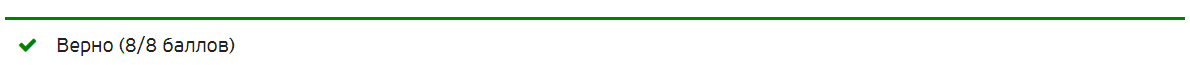

In [18]:
from scipy.spatial.distance import cosine

In [19]:
# 1. Косинусное расстояние между векторами слов
task = ["student", "smart"]

print("GN: %.3f" % w.distance(task[0], task[1]))
print("BR: %.3f" % w_british.distance(task[0] + "_NOUN", task[1] + "_NOUN"))

GN: 0.934
BR: 0.720


In [20]:
# 2. Определение лишнего слова
words = ['student', 'smart', 'wood', 'money']
words_NOUN = [word + "_NOUN" for word in words]

print("GN:", w.doesnt_match(words))
print("BR:", w_british.doesnt_match(words_NOUN).replace("_NOUN", ""))

GN: wood
BR: student


In [21]:
import scipy.spatial.distance

# 3. Косинусное расстояние между векторами предложений
sent_1 = "journey thousand miles begins with single step".split()
sent_2 = "leopard can not change its spots".split()

# Для модели GN
vect_1_gn = np.mean([w[word] for word in sent_1 if word in w], axis=0)
vect_2_gn = np.mean([w[word] for word in sent_2 if word in w], axis=0)

similarity_sentences_gn = scipy.spatial.distance.cosine(vect_1_gn, vect_2_gn)
print(f"Косинусное расстояние предложений GN: {similarity_sentences_gn:.3f}")

Косинусное расстояние предложений GN: 0.672


In [22]:
# 4. Корреляция Спирмена
data = pd.read_csv('/content/wordsim_similarity_goldstandard.txt', sep="\t", header=None)
data.columns = ["first", "second", "score"]

# Установим значения подвыборки
subdata = data.iloc[19:119]

# Проверим наличие слов в модели BR и вычисление корреляции Спирмена
gn_scores, br_scores, scores = [], [], []
removed_pairs = 0

for _, row in subdata.iterrows():
    w1, w2, s = row["first"], row["second"], row["score"]
    w1_noun, w2_noun = w1.lower() + "_NOUN", w2.lower() + "_NOUN"

    if w1_noun in w_british.key_to_index and w2_noun in w_british.key_to_index:
        gn_scores.append(w.similarity(w1, w2))
        br_scores.append(w_british.similarity(w1_noun, w2_noun))
        scores.append(s)
    else:
        removed_pairs += 1

corr_gn, _ = spearmanr(gn_scores, scores)
corr_br, _ = spearmanr(br_scores, scores)

print(f"Коэффициент корреляции Спирмена для модели GN: {corr_gn:.3f}")
print(f"Коэффициент корреляции Спирмена для модели BR: {corr_br:.3f}")
print(f"Количество удаленных из подвыборки пар слов: {removed_pairs}")


Коэффициент корреляции Спирмена для модели GN: 0.701
Коэффициент корреляции Спирмена для модели BR: 0.655
Количество удаленных из подвыборки пар слов: 3
